In [8]:
from access import access, weights, datasets
import logging
import requests
import json

import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

In [6]:
SG= pd.read_csv('https://raw.githubusercontent.com/nelsoniu/vaccine_accessibility/main/vaccination_sites/sg_vaccination_sites.csv')

In [7]:

# creating a geometry column 
geometry = [Point(xy) for xy in zip(SG['Longitude'], SG['Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(SG, crs=crs, geometry=geometry)

/Users/niu/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
gdf.type

0     Point
1     Point
2     Point
3     Point
4     Point
      ...  
74    Point
75    Point
76    Point
77    Point
78    Point
Length: 79, dtype: object

In [11]:
# Load in Singapore subzone shapefile

SG_boundary = gpd.read_file('sg_subzone.zip')
SG_boundary = SG_boundary.to_crs('SVY21')

<AxesSubplot:>

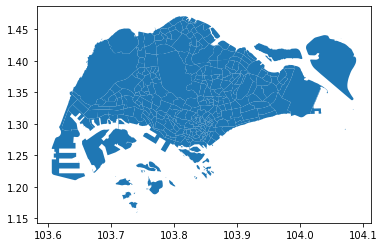

In [12]:
SG_boundary.plot()

In [13]:
# Get centroid 
for i in range(0,len(SG_boundary)):
    SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
    SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]

<ipython-input-13-4ff5c38a000c>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
<ipython-input-13-4ff5c38a000c>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]


In [14]:
SG_boundary

,OBJECTID,SUBZONE_N,PLN_AREA_N,TOTAL,BET0TO4,BET5TO9,BET10TO14,BET15TO19,BET20TO24,BET25TO29,...,OVER85,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry,centroid_lon,centroid_lat
0,1,PASIR PANJANG 1,QUEENSTOWN,4090.0,210.0,210.0,190.0,220.0,260.0,290.0,...,50.0,3470490CA5ED5ED5,2016-09-22,22077.3383,29893.7812,6571.323082,1.084792e+06,"POLYGON ((103.77039 1.29249, 103.77036 1.29240...",103.780101,1.286623
1,2,QUEENSWAY,QUEENSTOWN,280.0,0.0,10.0,10.0,10.0,20.0,20.0,...,0.0,FB54F4357BE67F19,2016-09-22,24168.3106,30104.1768,3454.239283,6.316443e+05,"POLYGON ((103.80162 1.28416, 103.80159 1.28410...",103.798889,1.288526
2,3,KENT RIDGE,QUEENSTOWN,1020.0,20.0,50.0,60.0,40.0,60.0,90.0,...,0.0,94BC564228E23B53,2016-09-22,23464.8409,29725.3706,7439.547656,1.826849e+06,"POLYGON ((103.79138 1.29026, 103.79279 1.28911...",103.792568,1.285100
3,4,ALEXANDRA NORTH,BUKIT MERAH,1040.0,60.0,70.0,50.0,60.0,40.0,70.0,...,0.0,026E408A08774C44,2016-09-22,26548.2507,30519.3922,2907.051461,2.937064e+05,"POLYGON ((103.81743 1.29431, 103.81787 1.29393...",103.820274,1.292281
4,5,MARINA EAST,MARINA EAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7463501529F5588E,2016-09-22,32344.0489,30103.2495,6470.949643,1.844061e+06,"POLYGON ((103.88017 1.28384, 103.88016 1.28384...",103.872352,1.288517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,THE WHARVES,SEMBAWANG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,C0F013DFA1BD2609,2016-09-22,26945.0680,49552.7904,11828.877719,1.635808e+06,"POLYGON ((103.81732 1.47077, 103.81732 1.47070...",103.823839,1.464412
319,320,SENOKO NORTH,SEMBAWANG,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,05D0CDFA55EBFF90,2016-09-22,24665.7878,49482.5953,7392.128851,2.241387e+06,"POLYGON ((103.81577 1.47062, 103.81578 1.47047...",103.803357,1.463777
320,321,CHANGI POINT,CHANGI,770.0,20.0,30.0,30.0,50.0,40.0,40.0,...,30.0,08E1CF09627396E1,2016-09-22,44603.6326,41360.4186,4897.482363,9.959448e+05,"POLYGON ((103.98236 1.39356, 103.98242 1.39349...",103.982515,1.390319
321,322,SENGKANG TOWN CENTRE,SENGKANG,55740.0,3210.0,3570.0,3360.0,3890.0,3530.0,3630.0,...,390.0,E01905552A9FA608,2016-09-22,35163.8120,41501.1418,5216.400502,1.455508e+06,"POLYGON ((103.90175 1.38699, 103.90170 1.38654...",103.897691,1.391595


In [ ]:
# Calculate Euclidean Distance

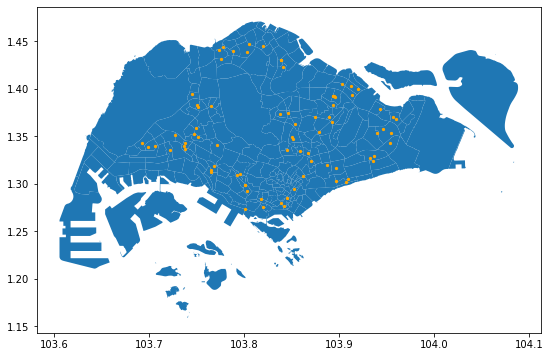

In [23]:
# Plotting Supply Points

gdf.plot(ax=SG_boundary.plot(figsize=(20, 6)), marker='o', color='orange', markersize=5);